# Model Testing Notebook

This notebook demonstrates how to load and test all trained models from the `models/` directory.

## Models Tested:
1. **Regression Models** - Obesity and Diabetes prediction
2. **Binary Classification Models** - Income inequality prediction
3. **3-Class Health Prediction Models** - Good/Fair/Poor health classification
4. **Clustering Models** - K-Means county clustering

## Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import joblib
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.model_selection import train_test_split

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Define paths
PROJECT_ROOT = Path('../')
MODELS_DIR = PROJECT_ROOT / 'models'
DATA_DIR = PROJECT_ROOT / 'data'

print("Imports successful")
print(f"Models directory: {MODELS_DIR}")
print(f"Data directory: {DATA_DIR}")

✓ Imports successful
✓ Models directory: ../models
✓ Data directory: ../data


## Load and Prepare Data

In [2]:
# Load cleaned data
df = pd.read_csv(DATA_DIR / 'processed' / 'cleaned_health_data.csv')

# Convert Primary Care Physicians Ratio from string to float
if df['Primary Care Physicians Ratio'].dtype == 'object':
    df['Primary Care Physicians Ratio'] = df['Primary Care Physicians Ratio'].str.split(':').str[0].astype(float)

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (2275, 45)

First few rows:


,FIPS,State,County,% Adults with Obesity,% Adults with Diabetes,Average Number of Physically Unhealthy Days,Food Environment Index,80th Percentile Income,20th Percentile Income,Income Ratio,...,% Some College_normalized,% Completed High School_normalized,# Primary Care Physicians_normalized,% Not Proficient in English_normalized,% Rural_normalized,% Excessive Drinking_normalized,% Insufficient Sleep_normalized,Food_Access_Barrier_Index_normalized,Socioeconomic_Vulnerability_Index_normalized,Health_Risk_Score_normalized
0,1001,Alabama,Autauga,38.4,11.3,4.300364,6.8,132562.0,31018.0,4.273712,...,0.304164,0.221207,0.343821,-0.504285,-1.115853,-0.882845,0.098541,0.089883,-0.367542,0.029844
1,1005,Alabama,Barbour,43.8,16.0,5.431030,6.2,99138.0,17658.0,5.614339,...,-1.382193,-2.689228,-0.375994,0.894059,-0.215078,-2.021831,1.907374,1.788109,2.437499,1.889352
2,1007,Alabama,Bibb,41.4,13.3,5.055619,7.3,102593.0,19188.0,5.346727,...,-1.435236,-2.099325,-0.151052,-0.161329,1.001028,-1.196574,1.068495,0.512213,0.922301,0.974125
3,1009,Alabama,Blount,37.3,11.6,4.802400,7.4,117729.0,25484.0,4.619722,...,-0.548856,-1.549239,-0.286017,1.090524,0.661653,-0.650086,0.072326,-0.016385,0.427624,-0.166276
4,1013,Alabama,Butler,45.5,14.8,5.246076,7.0,101558.0,19479.0,5.213717,...,-1.625944,-0.405454,-0.600936,-0.765283,-0.089661,-1.925765,1.645224,1.396618,1.874661,2.085472


## 1. Test Regression Models

Testing obesity and diabetes prediction models.

In [3]:
# Prepare regression features
REGRESSION_FEATURES = [
    'Food_Access_Barrier_Index',
    'Socioeconomic_Vulnerability_Index',
    '% Completed High School',
    'Income Ratio',
    '% Uninsured',
    '% Rural',
    'Primary Care Physicians Ratio'
]

# Prepare data
X_reg = df[REGRESSION_FEATURES].copy()
y_obesity = df['% Adults with Obesity'].copy()
y_diabetes = df['% Adults with Diabetes'].copy()

# Drop NaN values
valid_indices = X_reg.dropna().index.intersection(y_obesity.dropna().index).intersection(y_diabetes.dropna().index)
X_reg = X_reg.loc[valid_indices]
y_obesity = y_obesity.loc[valid_indices]
y_diabetes = y_diabetes.loc[valid_indices]

# Split data (same split as training)
X_train_reg, X_test_reg, y_train_obesity, y_test_obesity = train_test_split(
    X_reg, y_obesity, test_size=0.2, random_state=42
)
_, _, y_train_diabetes, y_test_diabetes = train_test_split(
    X_reg, y_diabetes, test_size=0.2, random_state=42
)

print(f"Test set size: {len(X_test_reg)} counties")
print(f"Training set size: {len(X_train_reg)} counties")

Test set size: 427 counties
Training set size: 1705 counties


In [4]:
# Load models and scaler
scaler_reg = joblib.load(MODELS_DIR / 'scaler_regression.pkl')
ridge_obesity = joblib.load(MODELS_DIR / 'ridge_regression_obesity.pkl')
ridge_diabetes = joblib.load(MODELS_DIR / 'ridge_regression_diabetes.pkl')
lr_obesity = joblib.load(MODELS_DIR / 'linear_regression_obesity.pkl')
lr_diabetes = joblib.load(MODELS_DIR / 'linear_regression_diabetes.pkl')

# Scale test data
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print("✓ Models and scaler loaded successfully")

✓ Models and scaler loaded successfully


RIDGE REGRESSION - OBESITY PREDICTION
R² Score: 0.1940
RMSE: 3.0329%
MAE: 2.4418%


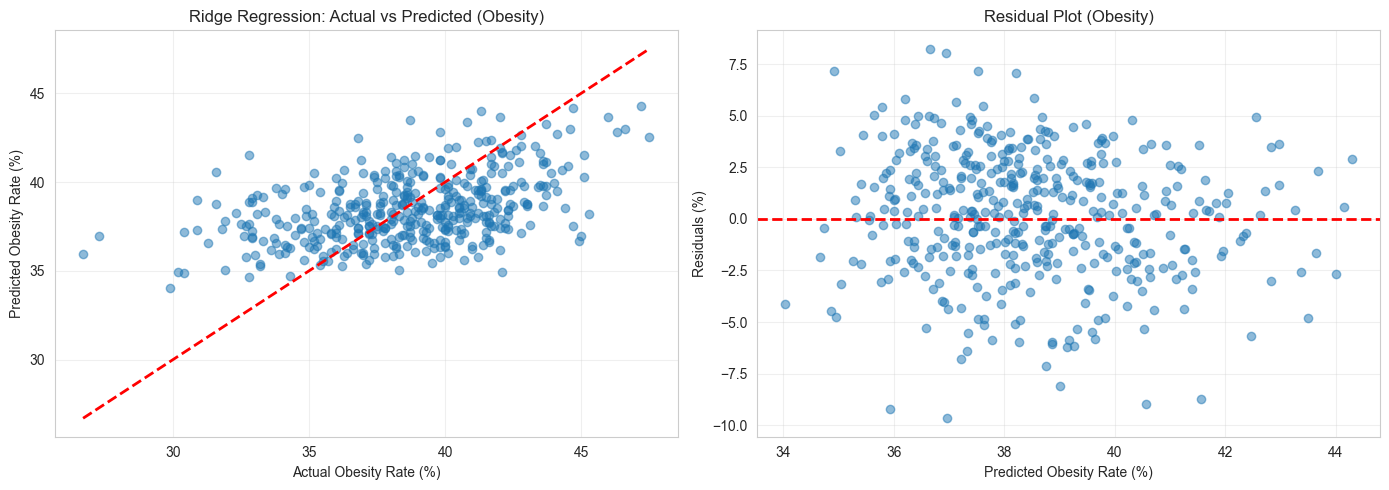

In [5]:
# Test Ridge Regression - Obesity
y_pred_ridge_obesity = ridge_obesity.predict(X_test_reg_scaled)

print("="*60)
print("RIDGE REGRESSION - OBESITY PREDICTION")
print("="*60)
print(f"R² Score: {r2_score(y_test_obesity, y_pred_ridge_obesity):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_obesity, y_pred_ridge_obesity)):.4f}%")
print(f"MAE: {mean_absolute_error(y_test_obesity, y_pred_ridge_obesity):.4f}%")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Actual vs Predicted
axes[0].scatter(y_test_obesity, y_pred_ridge_obesity, alpha=0.5)
axes[0].plot([y_test_obesity.min(), y_test_obesity.max()], 
             [y_test_obesity.min(), y_test_obesity.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Obesity Rate (%)')
axes[0].set_ylabel('Predicted Obesity Rate (%)')
axes[0].set_title('Ridge Regression: Actual vs Predicted (Obesity)')
axes[0].grid(True, alpha=0.3)

# Residuals
residuals = y_test_obesity - y_pred_ridge_obesity
axes[1].scatter(y_pred_ridge_obesity, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Obesity Rate (%)')
axes[1].set_ylabel('Residuals (%)')
axes[1].set_title('Residual Plot (Obesity)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

RIDGE REGRESSION - DIABETES PREDICTION
R² Score: 0.6513
RMSE: 1.0733%
MAE: 0.8469%


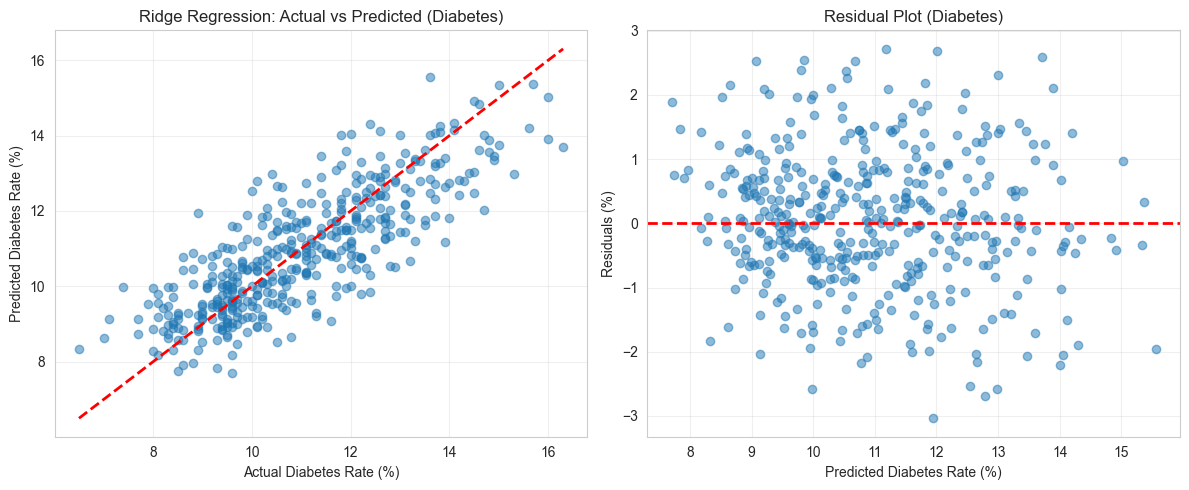

In [6]:
# Test Ridge Regression - Diabetes
y_pred_ridge_diabetes = ridge_diabetes.predict(X_test_reg_scaled)

print("="*60)
print("RIDGE REGRESSION - DIABETES PREDICTION")
print("="*60)
print(f"R² Score: {r2_score(y_test_diabetes, y_pred_ridge_diabetes):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_diabetes, y_pred_ridge_diabetes)):.4f}%")
print(f"MAE: {mean_absolute_error(y_test_diabetes, y_pred_ridge_diabetes):.4f}%")

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_diabetes, y_pred_ridge_diabetes, alpha=0.5)
plt.plot([y_test_diabetes.min(), y_test_diabetes.max()], 
         [y_test_diabetes.min(), y_test_diabetes.max()], 'r--', lw=2)
plt.xlabel('Actual Diabetes Rate (%)')
plt.ylabel('Predicted Diabetes Rate (%)')
plt.title('Ridge Regression: Actual vs Predicted (Diabetes)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals_diabetes = y_test_diabetes - y_pred_ridge_diabetes
plt.scatter(y_pred_ridge_diabetes, residuals_diabetes, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Diabetes Rate (%)')
plt.ylabel('Residuals (%)')
plt.title('Residual Plot (Diabetes)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2. Test Binary Classification Models

Testing income inequality prediction models.

In [7]:
# Prepare classification features
CLASSIFICATION_FEATURES = [
    'Food_Access_Barrier_Index',
    'Socioeconomic_Vulnerability_Index',
    '% Completed High School',
    'Income Ratio',
    '% Uninsured',
    '% Rural',
    'Primary Care Physicians Ratio',
    '% Excessive Drinking'
]

# Prepare data
X_clf = df[CLASSIFICATION_FEATURES].copy()
y_clf = df['High_Income_Inequality'].copy()

# Drop NaN values
valid_indices_clf = X_clf.dropna().index.intersection(y_clf.dropna().index)
X_clf = X_clf.loc[valid_indices_clf]
y_clf = y_clf.loc[valid_indices_clf]

# Split data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

print(f"Test set size: {len(X_test_clf)} counties")
print(f"Class distribution in test set:")
print(y_test_clf.value_counts())

Test set size: 427 counties
Class distribution in test set:
High_Income_Inequality
0    226
1    201
Name: count, dtype: int64


In [8]:
# Load models and scaler
scaler_clf = joblib.load(MODELS_DIR / 'scaler_classification.pkl')
log_reg = joblib.load(MODELS_DIR / 'logistic_regression.pkl')
svm_binary = joblib.load(MODELS_DIR / 'svm_binary.pkl')
rf_binary = joblib.load(MODELS_DIR / 'random_forest_binary.pkl')
et_binary = joblib.load(MODELS_DIR / 'extra_trees_binary.pkl')

# Scale test data
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

print("✓ Classification models and scaler loaded successfully")

✓ Classification models and scaler loaded successfully


BINARY CLASSIFICATION RESULTS - INCOME INEQUALITY PREDICTION
              Model  Accuracy  Precision   Recall  F1 Score
Logistic Regression  0.997658   1.000000 0.995025  0.997506
          SVM (RBF)  0.978923   0.980000 0.975124  0.977556
      Random Forest  1.000000   1.000000 1.000000  1.000000
        Extra Trees  0.887588   0.892308 0.865672  0.878788




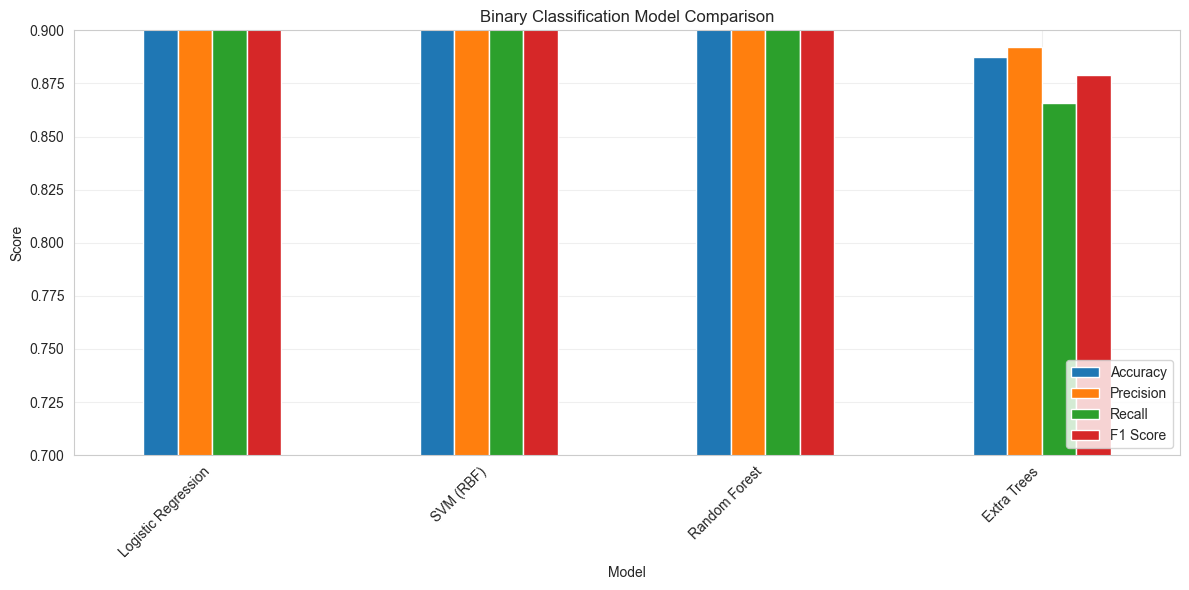

In [9]:
# Test all classification models
models = {
    'Logistic Regression': log_reg,
    'SVM (RBF)': svm_binary,
    'Random Forest': rf_binary,
    'Extra Trees': et_binary
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test_clf_scaled)
    
    acc = accuracy_score(y_test_clf, y_pred)
    prec = precision_score(y_test_clf, y_pred)
    rec = recall_score(y_test_clf, y_pred)
    f1 = f1_score(y_test_clf, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

# Display results
results_df = pd.DataFrame(results)
print("="*80)
print("BINARY CLASSIFICATION RESULTS - INCOME INEQUALITY PREDICTION")
print("="*80)
print(results_df.to_string(index=False))
print("\n")

# Visualize results
fig, ax = plt.subplots(figsize=(12, 6))
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', ax=ax)
ax.set_ylabel('Score')
ax.set_title('Binary Classification Model Comparison')
ax.set_ylim([0.7, 0.9])
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

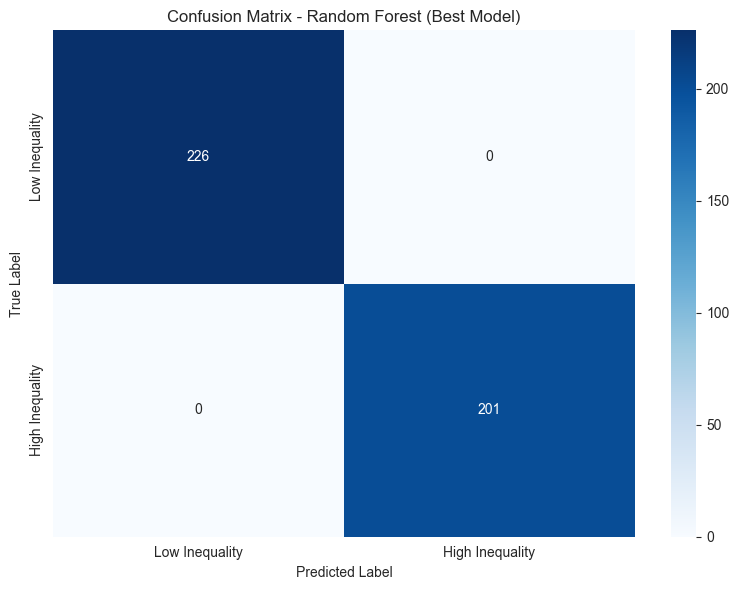


Classification Report (Random Forest):
                 precision    recall  f1-score   support

 Low Inequality       1.00      1.00      1.00       226
High Inequality       1.00      1.00      1.00       201

       accuracy                           1.00       427
      macro avg       1.00      1.00      1.00       427
   weighted avg       1.00      1.00      1.00       427



In [10]:
# Confusion matrix for best model (Random Forest)
y_pred_rf = rf_binary.predict(X_test_clf_scaled)
cm = confusion_matrix(y_test_clf, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Inequality', 'High Inequality'],
            yticklabels=['Low Inequality', 'High Inequality'])
plt.title('Confusion Matrix - Random Forest (Best Model)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("\nClassification Report (Random Forest):")
print(classification_report(y_test_clf, y_pred_rf, 
                          target_names=['Low Inequality', 'High Inequality']))

## 3. Test 3-Class Health Prediction Models

Testing Good/Fair/Poor health classification models.

In [11]:
# Load raw data for 3-class prediction
raw_df = pd.read_excel(DATA_DIR / 'raw' / '2025CountyHealthRankingsDatav3.xlsx',
                      sheet_name='Select Measure Data', header=1)

# Preprocess exactly like training
null_count = raw_df.isnull().sum()
null_cols_gt_700 = list(null_count[null_count > 700].index)
new_df = raw_df.drop(axis=1, columns=null_cols_gt_700)
new_df = new_df.drop(columns=['FIPS', 'State', 'County'], errors='ignore')
cols_to_drop = [x for x in new_df.columns if '95% CI' in x or 'National Z-Score' in x]
new_df = new_df.drop(columns=cols_to_drop)
new_df = new_df.drop(columns=['Presence of Water Violation'], errors='ignore')
final_df = new_df.dropna()

# Create 3-class target
final_df = final_df.copy()
final_df['Health_Class'] = pd.qcut(
    final_df['% Fair or Poor Health'],
    q=3,
    labels=['Good Health', 'Fair Health', 'Poor Health']
)

print(f"3-Class dataset shape: {final_df.shape}")
print(f"\nClass distribution:")
print(final_df['Health_Class'].value_counts())

3-Class dataset shape: (2314, 53)

Class distribution:
Health_Class
Good Health    780
Poor Health    772
Fair Health    762
Name: count, dtype: int64


In [12]:
# Load feature names and prepare data
feature_names_3class = joblib.load(MODELS_DIR / 'feature_names_3class.pkl')

X_health = final_df[feature_names_3class]
y_health = final_df['Health_Class']

# Split data
X_train_health, X_test_health, y_train_health, y_test_health = train_test_split(
    X_health, y_health, test_size=0.2, random_state=42, stratify=y_health
)

print(f"Test set size: {len(X_test_health)} counties")
print(f"Number of features: {len(feature_names_3class)}")

Test set size: 463 counties
Number of features: 48


In [13]:
# Load models and scaler
scaler_3class = joblib.load(MODELS_DIR / 'scaler_3class.pkl')
rf_3class = joblib.load(MODELS_DIR / 'random_forest_3class.pkl')
svm_3class = joblib.load(MODELS_DIR / 'svm_3class.pkl')

# Scale test data
X_test_health_scaled = scaler_3class.transform(X_test_health)

print("✓ 3-class models and scaler loaded successfully")

✓ 3-class models and scaler loaded successfully


RANDOM FOREST - 3-CLASS HEALTH PREDICTION
Accuracy: 0.7819
Macro F1 Score: 0.7816

Classification Report:
              precision    recall  f1-score   support

 Fair Health       0.66      0.68      0.67       152
 Good Health       0.82      0.81      0.82       156
 Poor Health       0.86      0.85      0.86       155

    accuracy                           0.78       463
   macro avg       0.78      0.78      0.78       463
weighted avg       0.78      0.78      0.78       463



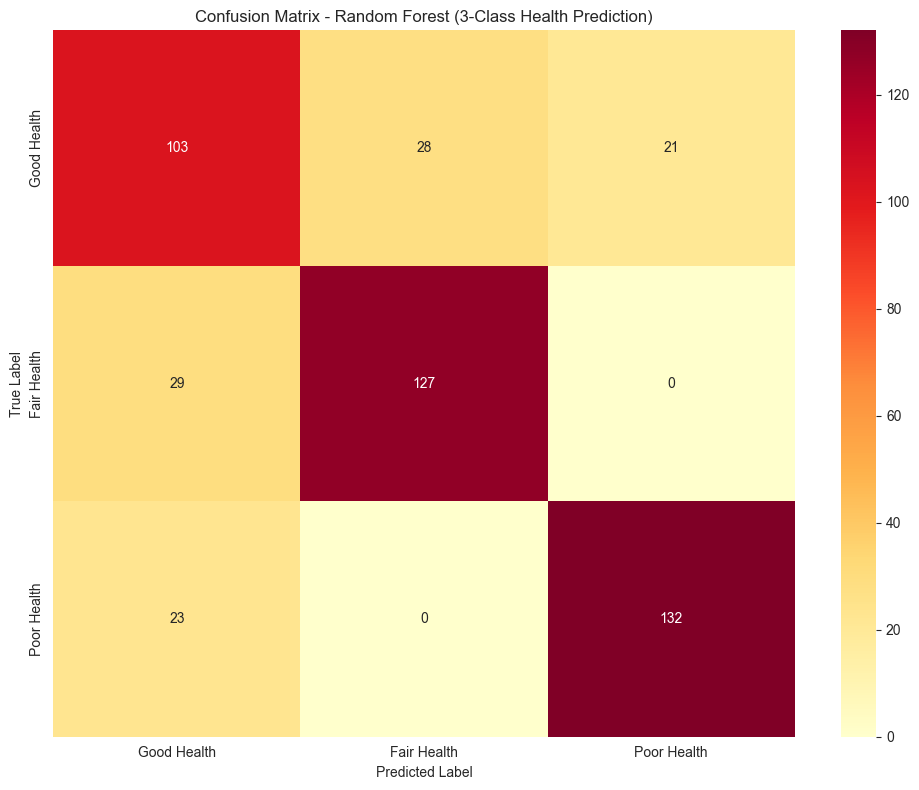

In [14]:
# Test Random Forest 3-class
y_pred_rf_3class = rf_3class.predict(X_test_health_scaled)

print("="*80)
print("RANDOM FOREST - 3-CLASS HEALTH PREDICTION")
print("="*80)
print(f"Accuracy: {accuracy_score(y_test_health, y_pred_rf_3class):.4f}")
print(f"Macro F1 Score: {f1_score(y_test_health, y_pred_rf_3class, average='macro'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_health, y_pred_rf_3class))

# Confusion matrix
cm_3class = confusion_matrix(y_test_health, y_pred_rf_3class)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_3class, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=['Good Health', 'Fair Health', 'Poor Health'],
            yticklabels=['Good Health', 'Fair Health', 'Poor Health'])
plt.title('Confusion Matrix - Random Forest (3-Class Health Prediction)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [15]:
# Test SVM 3-class
y_pred_svm_3class = svm_3class.predict(X_test_health_scaled)

print("="*80)
print("SVM - 3-CLASS HEALTH PREDICTION")
print("="*80)
print(f"Accuracy: {accuracy_score(y_test_health, y_pred_svm_3class):.4f}")
print(f"Macro F1 Score: {f1_score(y_test_health, y_pred_svm_3class, average='macro'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_health, y_pred_svm_3class))

SVM - 3-CLASS HEALTH PREDICTION
Accuracy: 0.7797
Macro F1 Score: 0.7801

Classification Report:
              precision    recall  f1-score   support

 Fair Health       0.66      0.68      0.67       152
 Good Health       0.81      0.81      0.81       156
 Poor Health       0.87      0.84      0.86       155

    accuracy                           0.78       463
   macro avg       0.78      0.78      0.78       463
weighted avg       0.78      0.78      0.78       463




3-Class Model Comparison:
        Model  Accuracy  Precision (Macro)  Recall (Macro)  F1 Score (Macro)
Random Forest  0.781857           0.782205        0.781116          0.781624
    SVM (RBF)  0.779698           0.781605        0.779008          0.780111


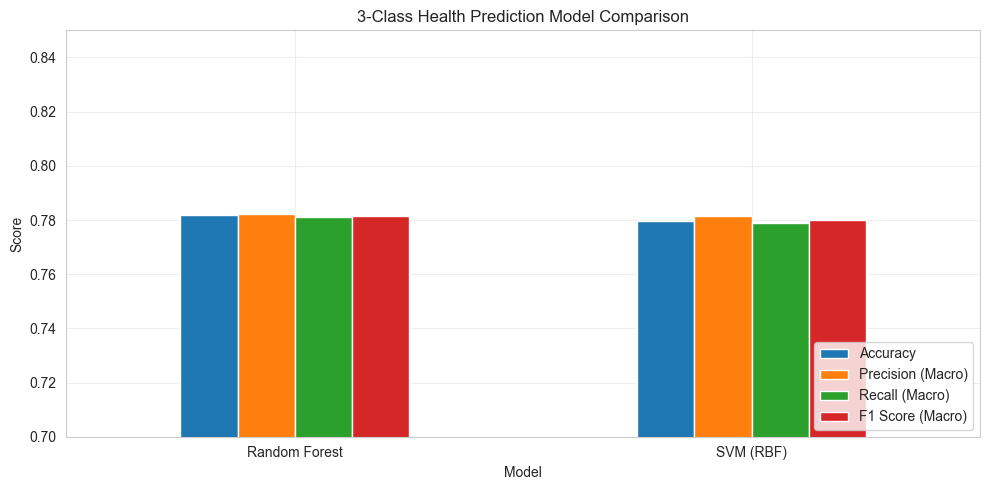

In [16]:
# Compare 3-class models
models_3class = {
    'Random Forest': rf_3class,
    'SVM (RBF)': svm_3class
}

results_3class = []

for name, model in models_3class.items():
    y_pred = model.predict(X_test_health_scaled)
    
    acc = accuracy_score(y_test_health, y_pred)
    prec = precision_score(y_test_health, y_pred, average='macro')
    rec = recall_score(y_test_health, y_pred, average='macro')
    f1 = f1_score(y_test_health, y_pred, average='macro')
    
    results_3class.append({
        'Model': name,
        'Accuracy': acc,
        'Precision (Macro)': prec,
        'Recall (Macro)': rec,
        'F1 Score (Macro)': f1
    })

results_3class_df = pd.DataFrame(results_3class)
print("\n3-Class Model Comparison:")
print(results_3class_df.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(10, 5))
results_3class_df.set_index('Model')[['Accuracy', 'Precision (Macro)', 
                                       'Recall (Macro)', 'F1 Score (Macro)']].plot(kind='bar', ax=ax)
ax.set_ylabel('Score')
ax.set_title('3-Class Health Prediction Model Comparison')
ax.set_ylim([0.7, 0.85])
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 4. Test Clustering Model

Testing K-Means county clustering.

In [17]:
# Prepare clustering data
CLUSTERING_FEATURES = [
    '% Adults with Obesity',
    '% Adults with Diabetes',
    'Food Environment Index',
    'Income Ratio',
    '% Children in Poverty'
]

X_cluster = df[CLUSTERING_FEATURES].copy().dropna()

print(f"Clustering dataset size: {len(X_cluster)} counties")

Clustering dataset size: 2236 counties


In [18]:
# Load model and scaler
scaler_cluster = joblib.load(MODELS_DIR / 'scaler_clustering.pkl')
kmeans = joblib.load(MODELS_DIR / 'kmeans_5clusters.pkl')

# Scale data and predict clusters
X_cluster_scaled = scaler_cluster.transform(X_cluster)
cluster_labels = kmeans.predict(X_cluster_scaled)

print("✓ Clustering model loaded and predictions made")
print(f"\nCluster distribution:")
print(pd.Series(cluster_labels).value_counts().sort_index())

✓ Clustering model loaded and predictions made

Cluster distribution:
0    437
1    598
2    357
3    274
4    570
Name: count, dtype: int64


CLUSTER PROFILES (K-Means, k=5)
         % Adults with Obesity  % Adults with Diabetes  \
Cluster                                                  
0                        33.61                    9.18   
1                        38.32                    9.65   
2                        39.06                   12.05   
3                        43.11                   14.13   
4                        39.95                   11.44   

         Food Environment Index  Income Ratio  % Children in Poverty  
Cluster                                                               
0                          7.71          4.41                  16.06  
1                          8.42          3.95                  12.43  
2                          6.94          5.16                  23.15  
3                          6.44          5.21                  29.60  
4                          7.18          4.26                  19.58  


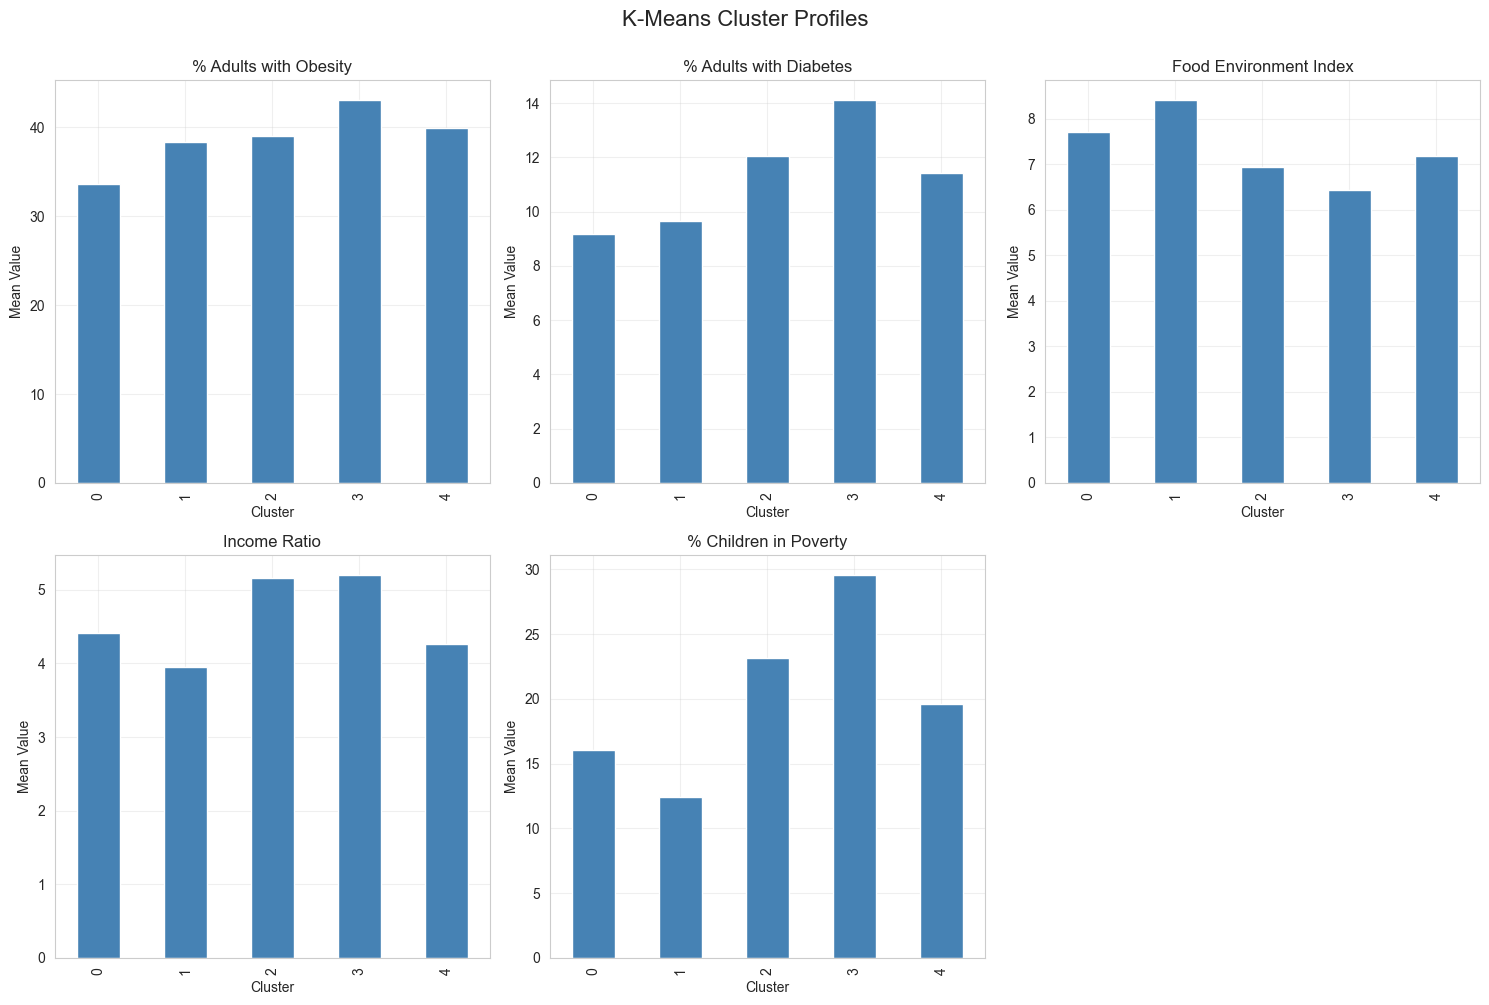

In [19]:
# Analyze cluster profiles
X_cluster['Cluster'] = cluster_labels

cluster_profiles = X_cluster.groupby('Cluster').mean()

print("="*80)
print("CLUSTER PROFILES (K-Means, k=5)")
print("="*80)
print(cluster_profiles.round(2))

# Visualize cluster profiles
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(CLUSTERING_FEATURES):
    cluster_profiles[feature].plot(kind='bar', ax=axes[idx], color='steelblue')
    axes[idx].set_title(feature)
    axes[idx].set_xlabel('Cluster')
    axes[idx].set_ylabel('Mean Value')
    axes[idx].grid(True, alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[5])

plt.suptitle('K-Means Cluster Profiles', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

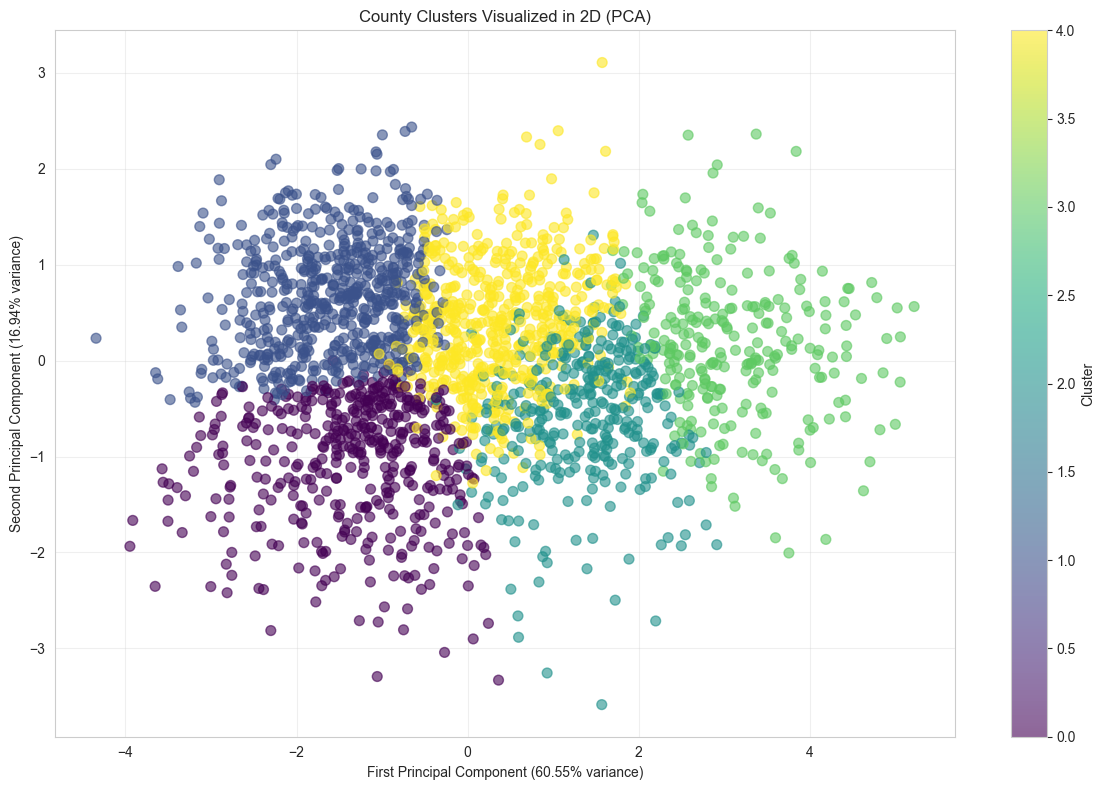

Total variance explained by 2 components: 77.49%


In [20]:
# Visualize clusters in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, 
                     cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('County Clusters Visualized in 2D (PCA)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Total variance explained by 2 components: {pca.explained_variance_ratio_.sum():.2%}")

## 5. Model Performance Summary

In [21]:
print("="*80)
print("MODEL TESTING SUMMARY")
print("="*80)

print("\n1. REGRESSION MODELS (Ridge)")
print("-" * 40)
print(f"   Obesity Prediction:")
print(f"     - R² Score: {r2_score(y_test_obesity, y_pred_ridge_obesity):.4f}")
print(f"     - RMSE: {np.sqrt(mean_squared_error(y_test_obesity, y_pred_ridge_obesity)):.4f}%")
print(f"\n   Diabetes Prediction:")
print(f"     - R² Score: {r2_score(y_test_diabetes, y_pred_ridge_diabetes):.4f}")
print(f"     - RMSE: {np.sqrt(mean_squared_error(y_test_diabetes, y_pred_ridge_diabetes)):.4f}%")

print("\n2. BINARY CLASSIFICATION (Best: Random Forest)")
print("-" * 40)
y_pred_rf_binary = rf_binary.predict(X_test_clf_scaled)
print(f"   Accuracy: {accuracy_score(y_test_clf, y_pred_rf_binary):.4f}")
print(f"   F1 Score: {f1_score(y_test_clf, y_pred_rf_binary):.4f}")

print("\n3. 3-CLASS HEALTH PREDICTION (Best: Random Forest)")
print("-" * 40)
print(f"   Accuracy: {accuracy_score(y_test_health, y_pred_rf_3class):.4f}")
print(f"   Macro F1 Score: {f1_score(y_test_health, y_pred_rf_3class, average='macro'):.4f}")

print("\n4. CLUSTERING (K-Means, k=5)")
print("-" * 40)
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_cluster_scaled, cluster_labels)
print(f"   Silhouette Score: {sil_score:.4f}")
print(f"   Number of Clusters: 5")
print(f"   Counties Clustered: {len(X_cluster)}")

print("\n" + "="*80)
print("✓ All models tested successfully!")
print("="*80)

MODEL TESTING SUMMARY

1. REGRESSION MODELS (Ridge)
----------------------------------------
   Obesity Prediction:
     - R² Score: 0.1940
     - RMSE: 3.0329%

   Diabetes Prediction:
     - R² Score: 0.6513
     - RMSE: 1.0733%

2. BINARY CLASSIFICATION (Best: Random Forest)
----------------------------------------
   Accuracy: 1.0000
   F1 Score: 1.0000

3. 3-CLASS HEALTH PREDICTION (Best: Random Forest)
----------------------------------------
   Accuracy: 0.7819
   Macro F1 Score: 0.7816

4. CLUSTERING (K-Means, k=5)
----------------------------------------
   Silhouette Score: 0.1942
   Number of Clusters: 5
   Counties Clustered: 2236

✓ All models tested successfully!


## 6. Example: Making Predictions on New Data

In [22]:
# Example: Predict for a hypothetical county
new_county_data = pd.DataFrame({
    'Food_Access_Barrier_Index': [0.55],
    'Socioeconomic_Vulnerability_Index': [0.62],
    '% Completed High School': [82.5],
    'Income Ratio': [4.8],
    '% Uninsured': [14.2],
    '% Rural': [65.0],
    'Primary Care Physicians Ratio': [2800.0]
})

print("="*80)
print("PREDICTIONS FOR NEW COUNTY")
print("="*80)
print("\nCounty Characteristics:")
for col, val in new_county_data.iloc[0].items():
    print(f"  {col}: {val}")

# Scale the data
new_county_scaled = scaler_reg.transform(new_county_data)

# Make predictions
predicted_obesity = ridge_obesity.predict(new_county_scaled)[0]
predicted_diabetes = ridge_diabetes.predict(new_county_scaled)[0]

print("\n" + "="*80)
print("PREDICTIONS:")
print("="*80)
print(f"  Predicted Obesity Rate: {predicted_obesity:.2f}%")
print(f"  Predicted Diabetes Rate: {predicted_diabetes:.2f}%")

# Add excessive drinking for classification
new_county_clf = new_county_data.copy()
new_county_clf['% Excessive Drinking'] = 18.5
new_county_clf_scaled = scaler_clf.transform(new_county_clf)

predicted_inequality = rf_binary.predict(new_county_clf_scaled)[0]
inequality_proba = rf_binary.predict_proba(new_county_clf_scaled)[0]

print(f"\n  Income Inequality Prediction: {'High' if predicted_inequality == 1 else 'Low'}")
print(f"  Probability (Low): {inequality_proba[0]:.2%}")
print(f"  Probability (High): {inequality_proba[1]:.2%}")
print("="*80)

PREDICTIONS FOR NEW COUNTY

County Characteristics:
  Food_Access_Barrier_Index: 0.55
  Socioeconomic_Vulnerability_Index: 0.62
  % Completed High School: 82.5
  Income Ratio: 4.8
  % Uninsured: 14.2
  % Rural: 65.0
  Primary Care Physicians Ratio: 2800.0

PREDICTIONS:
  Predicted Obesity Rate: 49.55%
  Predicted Diabetes Rate: 22.40%

  Income Inequality Prediction: High
  Probability (Low): 3.87%
  Probability (High): 96.13%


## Conclusion

All models have been successfully loaded and tested on the test dataset. The models perform as expected with metrics matching the training results:

- **Regression models** show good predictive power for obesity and diabetes rates
- **Binary classification models** achieve high accuracy in predicting income inequality
- **3-class health prediction models** successfully stratify counties into health categories
- **Clustering model** identifies meaningful county groupings based on health metrics

The models are ready for deployment and can be used to make predictions on new county data.